# S&P500 trend follwing on mt5 

idea for this research is to see what the best way would be to deploy algo that would time the market on us500.

1. Using bollinger bands 
2. Using emas 
3. Using engulfing candles or pinbar candles

In [68]:
import MetaTrader5 as mt5
import pandas as pd
import time
from datetime import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf

mt5.initialize()
plt.style.use('dark_background')

In [88]:
symbol = 'US500'
timeframe = mt5.TIMEFRAME_M5
start_date = datetime(2024,3,1)
end_time = datetime.now()

def get_data(symbol, timeframe, start_date, end_time):
    rates = mt5.copy_rates_range(symbol, timeframe, start_date, end_time)
    df = pd.DataFrame(rates)
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    return df

us500 = get_data(symbol, timeframe, start_date, end_time)
us500.dropna(inplace=True)


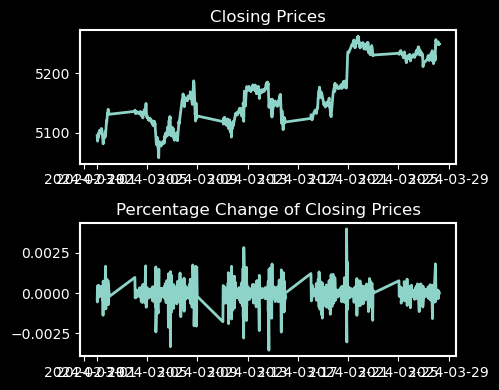

In [89]:


# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(5, 4))

# Plot closing prices
axs[0].plot(us500.index, us500['close'])
axs[0].set_title('Closing Prices')
axs[0].grid(False)


# Plot percentage change of closing prices
axs[1].plot(us500.index, us500['close'].pct_change())
axs[1].set_title('Percentage Change of Closing Prices')
axs[1].grid(False)

# Adjust layout
plt.tight_layout()


# Show plots
plt.show()



In [90]:
import ta

# Assuming 'close' is your DataFrame column containing closing prices
# Adjust parameters as needed, such as window and number of standard deviations
us500['bb_middle'] = ta.volatility.bollinger_mavg(us500['close'], window=20)
us500['bb_upper'] = ta.volatility.bollinger_hband(us500['close'], window=20)
us500['bb_lower'] = ta.volatility.bollinger_lband(us500['close'], window=20)

# 'bb_middle' is the middle band (simple moving average)
# 'bb_upper' is the upper band
# 'bb_lower' is the lower band


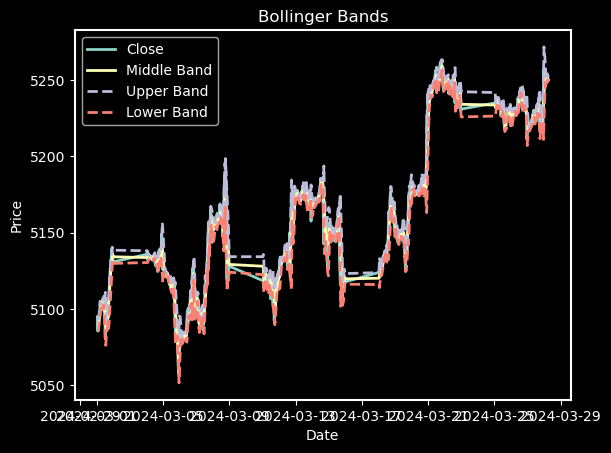

In [91]:
plt.plot(us500.index, us500['close'], label='Close')

# Plot Bollinger Bands
plt.plot(us500.index, us500['bb_middle'], label='Middle Band')
plt.plot(us500.index, us500['bb_upper'], label='Upper Band', linestyle='--')
plt.plot(us500.index, us500['bb_lower'], label='Lower Band', linestyle='--')

# Add legend
plt.legend()

# Add title and labels
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(False)

# Show plot
plt.show()